<a href="https://colab.research.google.com/github/farhan-naqvi/thesparksfoundation/blob/main/Task-6%20%3A%20Prediction%20using%20Decision%20Tree%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation : Data Science & Business Analytics Tasks


---


### Name : Syed Farhan Naqvi 

### Task - 6 : Prediction using Decision Tree Algorithm

### Link to Dataset : https://bit.ly/3kXTdox


---




In [ ]:
# importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Dataset
df = pd.read_csv("Iris (1).csv")

In [ ]:
# Loading the columns of the Dataset
print("Columns :")
for i in range(len(df.columns)):
  print("\t",str(i+1)+".",df.columns[i])

Columns :
	 1. Id
	 2. SepalLengthCm
	 3. SepalWidthCm
	 4. PetalLengthCm
	 5. PetalWidthCm
	 6. Species


In [ ]:
# Dropping the Id column
df = df.drop(['Id'],axis=1)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# printing some of the useful statistical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
print("(Rows, columns) :",df.shape)

(Rows, columns) : (150, 5)


In [ ]:
X = df.iloc[:,:-1].values.reshape(-1,4)
y = df.iloc[:,-1].values.reshape(-1,1)

In [ ]:
# Splitting the Data into training and testing data
X_train , X_test , y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [ ]:
# Using GridSearchCv to determine which model will give us maximum accuracy

model_params = {
    'svm' : {
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'Decision Trees' : {
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            "max_depth":range(1,10),
            "min_samples_split":range(1,10),
            # "max_samples_split":range(1,10),
        }
    }
    
    }


scores=[]
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score' : clf.best_score_,
        'best_param' : clf.best_params_
    })


pdm = pd.DataFrame(scores,columns=['model','best_score','best_param'])

pdm

,model,best_score,best_param
0,svm,0.993333,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,Decision Trees,0.973333,"{'criterion': 'gini', 'max_depth': 3, 'min_sam..."


## Decision Tree Model

In [ ]:
# Creating an instance of a  DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 3,min_samples_split= 4)

# Training the Data using the training Data
tree_model.fit(X_train, y_train)

# predicting the output of the test data
pred = tree_model.predict(X_test)

# Checking the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9736842105263158


# Visualizing the Tree Model Graphically

In [ ]:
from sklearn import tree

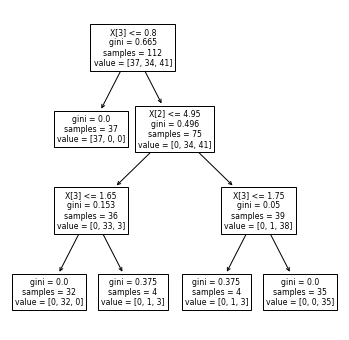

In [ ]:
plt.figure(figsize=(6,6))
tree.plot_tree(tree_model)
plt.show()

In [ ]:
!pip install graphviz
!pip install dtreeviz

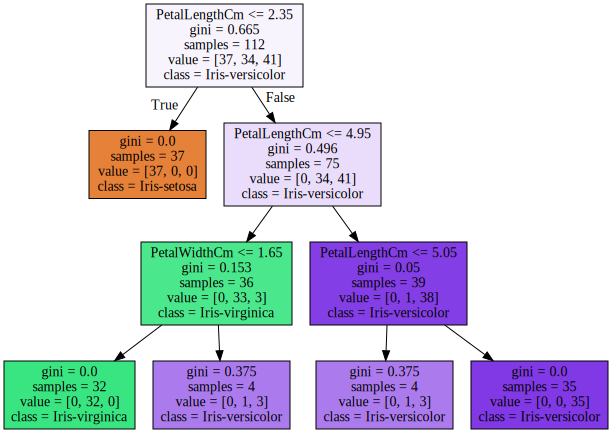

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package
# Importing libraries in Python
import sklearn.datasets as datasets
from sklearn import tree

iris=datasets.load_iris()
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                                class_names=['Iris-setosa','Iris-virginica','Iris-versicolor'],
                                filled=True)
import graphviz
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph